# KNN 분류 (KNN Classifier)
예제 : 길이와 무게를 주었을 때 bream일까, smelt일까?

In [1]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3,
                11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7,
                10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

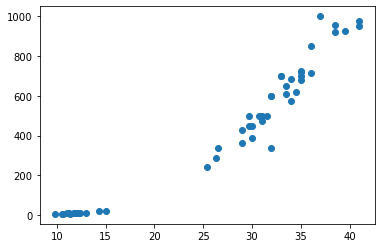

In [2]:
import pandas as pd
length = pd.DataFrame(bream_length + smelt_length)
weight = pd.DataFrame(bream_weight + smelt_weight)

import matplotlib.pyplot as plt

plt.scatter(length, weight)
plt.show()

In [3]:
import numpy as np

fish_data = pd.concat([length, weight], axis=1)
fish_data = np.array(fish_data)

# StandardScaler로 Zscore(MSE) 통일
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(fish_data)
fish_data = ss.transform(fish_data)

# Target 생성
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
fish_target = np.array(fish_target)


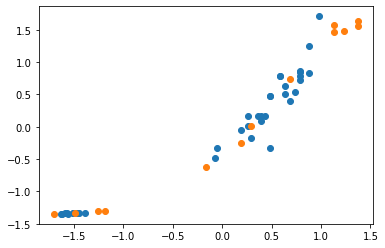

In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target)

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.show()

1.0
1.0
[1.]


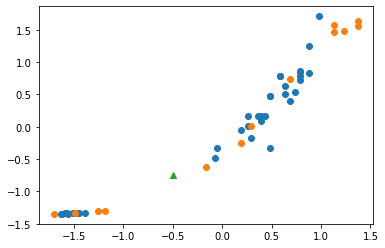

In [5]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
print(kn.score(train_input, train_target))
print(kn.score(test_input, test_target))

new = np.array([[22, 200]])
new = ss.transform(new)
print(kn.predict(new))

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.scatter(new[:,0], new[:,1], marker='^')
plt.show()


# KNN 회귀 (KNN Regressor)
예제 : perch의 길이를 주었을 때 무게를 예측하라

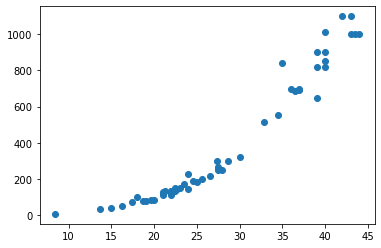

In [6]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
                         21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
                         23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
                         27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
                         39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
                         44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
                         115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
                         150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
                         218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
                         556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
                         850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
                         1000.0])

plt.scatter(perch_length, perch_weight)
plt.show()

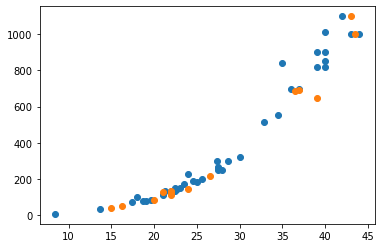

In [7]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight)

plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)
plt.show()


0.9757857777365978
0.9533968061555962


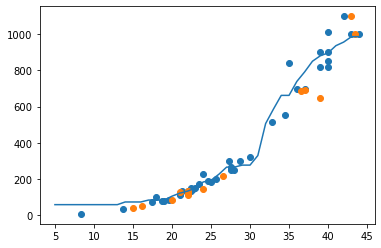

In [8]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

list = []
for i in range(5, 45):
    list.append(knr.predict([[i]]))

plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)
plt.plot(range(5,45), list)
plt.show()

# 1차 선형회귀 (LinearRegression)

0.9100342660992915
0.9424549226984327


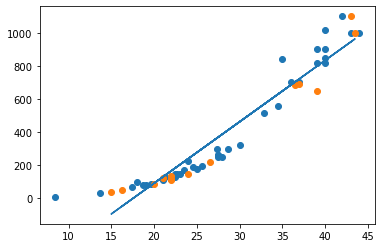

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))
pred = lr.predict(test_input)

plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)
plt.plot(test_input, pred)
plt.show()

# 2차 선형회귀

0.9712638722938511
0.9733304443751475
[  1.03226748 -22.29201789]


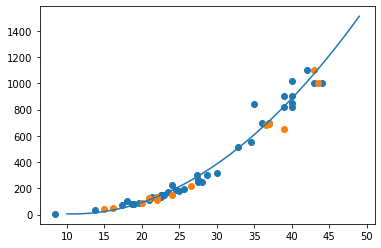

In [10]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
# pred = lr.predict(train_poly)

point = np.arange(10, 50)
print(lr.coef_)

plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)
plt.plot(point, lr.coef_[0]*point**2 + lr.coef_[1]*point + lr.intercept_)
plt.show()

# 3차 선형회귀

0.9726527163883558
0.9728981975609459
[-1.55543760e-02  2.26274130e+00 -5.19290933e+01]


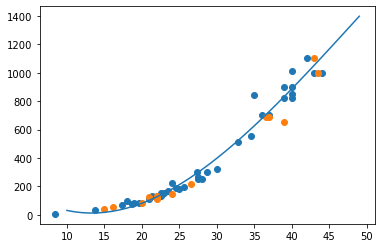

In [11]:
train_poly = np.column_stack((train_input ** 3,train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 3,test_input ** 2, test_input))

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
# pred = lr.predict(train_poly)

point = np.arange(10, 50)
print(lr.coef_)

plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)
plt.plot(point, lr.coef_[0]*point**3 + lr.coef_[1]*point**2 + lr.coef_[2]*point + lr.intercept_)
plt.show()

# 다중(3중) 1차 선형회귀

In [12]:
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()
# print(perch_full)

train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))


0.9559326821885706
0.8796419177546368


# 다중(3중) 2차 선형회귀

In [13]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

point = np.arange(10, 50)

0.9894085405916164
0.9831744307486032


# KNN 다중 분류 (KNN Classifier)
예제 : 길이, 무게, 대각선, 높이, 넓이를 주었을 때 어떤 물고기인지 맞춰라

In [14]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [15]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

kn = KNeighborsClassifier()
kn.fit(train_scaled, train_target)
print(kn.classes_)

# 5개를 예측
print(kn.predict(test_scaled[:5]))

# 예측한 5개의 확률
# probability: 확률
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']
[[0.  0.  0.6 0.  0.4 0.  0. ]
 [0.  0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.2 0.8 0.  0.  0. ]
 [0.  0.  0.8 0.  0.2 0.  0. ]
 [0.  0.  0.8 0.  0.2 0.  0. ]]


# 로지스틱회귀 이진분류 (LogisticRegression)
회귀라고 하지만 이진 분류만 가능하다  
예제 : 길이, 무게, 대각선, 높이, 넓이를 주었을 때 Bream과 Smelt만 일단 분류하라

In [17]:
# 불리언 인덱싱! 중요한 파이썬 문법이다!
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
# Bream과 Smelt만 뽑는다
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [18]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

# 예측
print(lr.predict(train_bream_smelt[:5]))

# 예측한 데이터의 확률
print(lr.predict_proba(train_bream_smelt[:5]))

# 로지스틱 회귀의 계수 확인
print(lr.coef_, lr.intercept_) 
# z = a*무게 + b*길이 + c*대각선 + d*높이 + e*두께 + f
# a,b,c,d,e,f 값이 나온다

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]
[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


# 로지스틱회귀 다중분류
예제 : 길이, 무게, 대각선, 높이, 넓이를 주었을 때 어떤 물고기인지 맞춰라

In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=20, max_iter=1000)
# C: 올라가면 규제가 약해지고, 내려가면 규제가 강해진다 (선형회귀와 반대) || iter: 반복횟수
# max_iter 값은 충분한 학습이 안될거라고 경고를 띄워준다.
# 하지만 C값은 우리가 정해주어야하는 것이므로 경고 띄우진 않음 (하이퍼파라미터)
lr.fit(train_scaled, train_target)

# 그냥 probability를 구할 때
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

# 좀 힘들게 구할 때 (softmax 함수 사용)
decisions = lr.decision_function(test_scaled[:5])
# z = a*무게 + b*길이 + c*대각선 + d*높이 + e*두께 + f
# z값이 나온다

from scipy.special import softmax
proba = softmax(decisions, axis=1)
print()
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


# 로지스틱회귀 다중분류 2
예제 : 알코올, 설탕, pH 를 주었을 때 화이트와인인지, 레드와인인지 구분하라

In [20]:
import pandas as pd
# wine = pd.read_csv("winequality-red.csv")
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [21]:
# data와 target
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

# 오버피팅을 방지하기 위해 train test 데이터 분리
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

# 8대 2 비율로 데이터를 나눔
print(train_input.shape, test_input.shape)

# 인풋을 전처리함
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

# 꼭 test도 변환시켜줘야 한다.
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

(5197, 3) (1300, 3)


In [22]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

pred = [[9.4, 1.9, 3.51]]
# KNN, 로지스틱 모두 꼭 Scaling의 과정을 거쳐야만 한다.
pred = ss.transform(pred)
print(lr.predict(pred))

0.7808350971714451
0.7776923076923077
[0.]


# 결정트리 다중분류 (DecisionTreeClassifier)

In [23]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
# Scailing을 안해도 된다!!!!!
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.996921300750433
0.8584615384615385


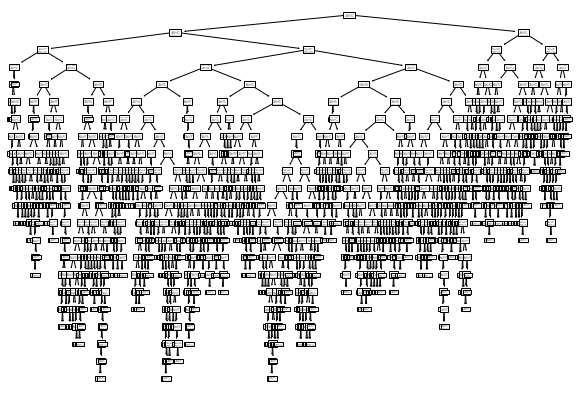

In [24]:
# 전체 그래프 출력
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(dt)
plt.show()

Overfitting을 방지하기 위한 가지치기 (Pruning) max_depth = 3

0.8454877814123533
0.8415384615384616
[0.12345626 0.86862934 0.0079144 ]


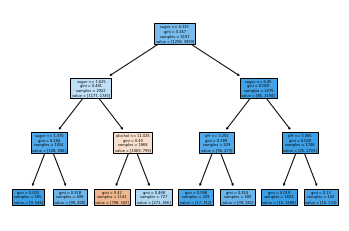

In [25]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

# 각 특성(feature)의 중요도를 출력
print(dt.feature_importances_)

# plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

# 교차 검증 (cross_validate)

훈련/검증 세트로 나누는데  
3폴드면  
훈련/훈련/검증  
훈련/검증/훈련  
검증/훈련/훈련  
이렇게 나눠지게 된다.

cross_validate는 기본 5폴드

In [26]:
from sklearn.model_selection import cross_validate

# 기본 5폴드
scores = cross_validate(dt, train_input, train_target)
print(scores)

# test_score의 평균값
import numpy as np
print(np.mean(scores['test_score']))

# 기본 10폴드
scores = cross_validate(dt, train_input, train_target, cv=10)
print(scores)

# splitter를 사용해서도 가능(디테일한 선택)
from sklearn.model_selection import StratifiedKFold
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))


{'fit_time': array([0.00208998, 0.00190282, 0.00192118, 0.00207591, 0.00215507]), 'score_time': array([0.000278  , 0.00024796, 0.00026274, 0.0005939 , 0.00033689]), 'test_score': array([0.84230769, 0.83365385, 0.84504331, 0.8373436 , 0.8479307 ])}
0.8412558303102096
{'fit_time': array([0.002285  , 0.00242114, 0.00260782, 0.00202703, 0.00197101,
       0.00190806, 0.00192213, 0.00209093, 0.00254297, 0.0021162 ]), 'score_time': array([0.00028586, 0.000278  , 0.00027299, 0.00022006, 0.00016308,
       0.0001471 , 0.00021911, 0.00028801, 0.00034428, 0.0001688 ]), 'test_score': array([0.825     , 0.85961538, 0.84230769, 0.825     , 0.87307692,
       0.84038462, 0.83461538, 0.83622351, 0.84200385, 0.84971098])}
0.8335549132947977


# 그리드 서치 (GridSearchCV)
결정트리의 하이퍼파라미터 튜닝

In [27]:
from sklearn.model_selection import GridSearchCV

# min_impurity_decrease를 튜닝하려고 함
params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

# n_jobs는 사용하는 코어 개수. -1은 가능한 모든 코어를 다 쓰는 것
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

# 가장 좋은 min_impurity_decrease가 하이퍼파라메타로 들어간 결정트리 생성자
print(gs.best_estimator_)
dt = gs.best_estimator_

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

# 가장 결과가 좋았던 파라메터를 출력
print(gs.best_params_)

# 교차 검증 스코어 출력
print(gs.cv_results_['mean_test_score'])

DecisionTreeClassifier(min_impurity_decrease=0.0001, random_state=42)
0.9615162593804117
0.8653846153846154
{'min_impurity_decrease': 0.0001}
[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


조금 더 빡세게 돌려볼까

In [28]:
from sklearn.model_selection import GridSearchCV

# min_impurity_decrease를 튜닝하려고 함
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(5, 20, 1),
          'min_samples_split': range(2, 100, 10)
          }

gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

print(gs.best_params_)

# 가장 좋은 min_impurity_decrease가 하이퍼파라메타로 들어간 결정트리 생성자
print(gs.best_estimator_)
dt = gs.best_estimator_

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}
DecisionTreeClassifier(max_depth=14, min_impurity_decrease=0.0004,
                       min_samples_split=12, random_state=42)
0.892053107562055
0.8615384615384616


# 랜덤 서치 (RandomizedSearchCV)

randint와 uniform

In [29]:
from scipy.stats import uniform, randint

# 1 부터 10까지 10개의 랜덤값 뽑아낼 때
rgen = randint(0, 10)
print(rgen.rvs(10))

# 천개를 뽑았을 때 같은 값이 거의 균등하게 나온다.
print(np.unique(rgen.rvs(1000), return_counts=True))

# uniform은 실수값의 랜덤값을 뽑아낸다
ugen = uniform(0, 1)
print(ugen.rvs(10))


[3 6 5 8 9 0 3 6 1 3]
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([ 93,  97, 102, 114, 109,  85,  83, 112,  96, 109]))
[0.15070159 0.41468884 0.3806     0.68958433 0.55683709 0.62766028
 0.28571664 0.28917242 0.41371412 0.19816623]


위의 내용을 바탕으로 랜덤서치를 수행해보자

In [30]:
from sklearn.model_selection import RandomizedSearchCV
params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20, 50),
          'min_samples_split': randint(2, 25),
          'min_samples_leaf': randint(1, 25),
          }

# n_iter는 만들어지는 모델의 개수 = 샘플링을 100번 한다는 뜻이다.
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params,
                        n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

print(gs.best_params_)

print(np.max(gs.cv_results_['mean_test_score']))

dt = gs.best_estimator_

print(dt.score(test_input, test_target))


{'max_depth': 39, 'min_impurity_decrease': 0.00034102546602601173, 'min_samples_leaf': 7, 'min_samples_split': 13}
0.8695428296438884
0.86


# 랜덤 포레스트 (RandomForestClassifier)

In [31]:
import numpy as np
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [32]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

# n_jobs는 사용할 코어수...
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

# 이름은 테스트 스코어지만 train만 넣어주었기 때문에 사실 검증세트다.
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


In [33]:
rf.fit(train_input, train_target)
# 데이터의 중요도 출력
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


In [34]:
# oob(Out Of Bagging) : 부트스트랩 샘플을 뽑아낼 때 뽑아내지 않은, 트리를 만들지 않은 샘플들
# oob는 트리에 사용되지 않으므로 검증세트로 사용할 수 있음
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)

rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


# 엑스트라 트리 (ExtraTreesClassifier)

In [35]:
# 부트스트랩 샘플을 사용하지 않는다
# 부트스트랩 샘플을 사용하지 않고 overfitting을 방지하는 방법은?
# 특성중에서 랜덤하게 뽑아낸 다음에 불순도가 가장 높은 것을 고른다
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

et.fit(train_input, train_target)
print(et.feature_importances_)

0.9974503966084433 0.8887848893166506
[0.20183568 0.52242907 0.27573525]


# 그레이디언트 부스팅 (GradientBoostingClassifier)
이전 트리의 손실을 보완하는 식으로 얕은 결정트리를 연속하여 추가

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


In [37]:
# n_estimators : 병렬로 생성되는 트리의 개수
# learning_rate : 너무 학습률이 좋으면 최저점을 찾기 힘들 기 때문에 학습속도 제어하는 매개변수
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


# 히스토그램 기반 그레디언트 부스팅
훈련 데이터를 256개 정수 구간으로 나누어 빠르고 높은 성능을 냄

In [38]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9321723946453317 0.8801241948619236


# permutation_importance
X값(feature)이 여러개가 있는데 하나의 X값 순서를 막 섞고 모델을 만들어봤는데  
예측값이 완전히 틀어졌다 -> 이 X값이 Y값에 영향을 많이 미친다는 것을 알 수 있다.  
이것으로 각 feature당 중요도를 알 수가 있다.  

In [39]:
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

# 당도를 섞어봤는데 0.2만큼의 정확도가 떨어졌다.  
# => 당도의 중요도가 크다는 뜻이다.

[0.08876275 0.23438522 0.08027708]


In [40]:
result = permutation_importance(hgb, test_input, test_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

# Test 데이터로도 측정해봤는데 이때도 당도가 0.2만큼의 정확도가 떨어졌다  
# => 실전에서도 당도는 중요도가 크다는 것을  확인할 수 있다.

[0.05969231 0.20238462 0.049     ]


# XGBoost & LightGBM

In [41]:
# XGBoost
print(train_input)
from xgboost import XGBClassifier

xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

# LightGBM
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

[[10.5   7.7   3.19]
 [12.4   2.1   3.26]
 [11.8   2.1   3.41]
 ...
 [ 9.5   5.6   3.24]
 [ 9.5   8.    3.18]
 [ 9.5   2.7   3.51]]


/opt/homebrew/Caskroom/miniforge/base/envs/py39/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/homebrew/Caskroom/miniforge/base/envs/py39/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/homebrew/Caskroom/miniforge/base/envs/py39/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/homebrew/Caskroom/miniforge/base/envs/py39/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pa

[20:13:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:13:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:13:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:13:47] WARNING: /Users/runner/miniforge3/cond